<p style="text-align:center; font-size:40px; margin-bottom: 30px;"><b> Linear discriminant analysis (LDA) </b></p>

<hr style="height:5px;border:none" />

# 1. What is a linear discriminant analysis?
<hr style="height:1px;border:none" />

We have seen that a [PCA](https://github.com/ellieshuojin/JupyterNotebook/blob/master/PCA.ipynb) is used to describe as much variability in the data with as few PCs as possible. The idea of a **linear discriminant analysis (LDA)** is somewhat similar to that. The main difference is that an LDA attempts to separate groups of observations, whereas PCA does not use any classification labels on the data. In other words, an LDA seeks a low-dimensional representation of data while separating groups as much as possible. An LDA utilizes the target information of observations; this is an example of ***supervised learning***.

<img style="width: 554px; padding: 0px;" src="https://github.com/ellieshuojin/JupyterNotebook/blob/master/images/LDA_Projection.jpg?raw=true" alt="Schematic of LDA, compared to PCA"/>

Like PCAs, components produced by an LDA are uncorrelated. 

# 2. Example: Iris data
<hr style="height:1px;border:none" />

Previously, we discovered that the Versicolors and the Virgnicas do not separate well in the iris data set, neither with a [PCA](https://github.com/ellieshuojin/JupyterNotebook/blob/master/PCA.ipynb) nor a K-means clustering. We will apply an LDA to the iris data and see if we can separate the 3 classes of irises.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Loading the iris data
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

So, we loaded the data. The actual LDA is implemented as the **`LinearDiscriminantAnalysis`** transformation object, under **`sklearn.discriminant_analysis`**. Its use is very similar to other transformation ojbects we have seen for unsupervised learning (e.g., [PCA](https://github.com/ellieshuojin/JupyterNotebook/blob/master/PCA.ipynb), [Factor Analysis](https://github.com/ellieshuojin/JupyterNotebook/blob/master/FactorAnalysis.ipynb), etc.). However, since this is a supervised learning method, we need to enter the target information associated with observations. Note that the **`.fit`** and **`.fit_transform`** methods require the feature data, as well as the target data.

In [3]:
# Performing the linear discriminant analysis
irisLDA = LinearDiscriminantAnalysis(n_components=2)
X_LDA = irisLDA.fit_transform(X,y)

Note that we used **`n_components=2`**. Now, let's take a look at the results, to see if the LDA can split the 3 classes of irises. Here, we plot LD (linear discriminant) 1 against LD2. 

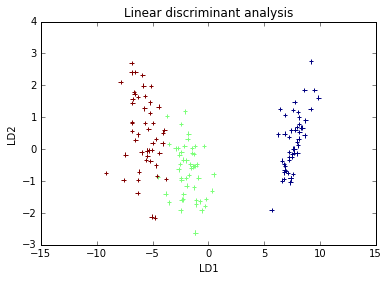

In [4]:
# Plotting the first and second LDs
plt.scatter(X_LDA[:,0],X_LDA[:,1],c=y,marker='+')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('Linear discriminant analysis')
plt.show()

You can see a good separation of different classes. Just as a comparison, we can run a PCA with the same number of components.

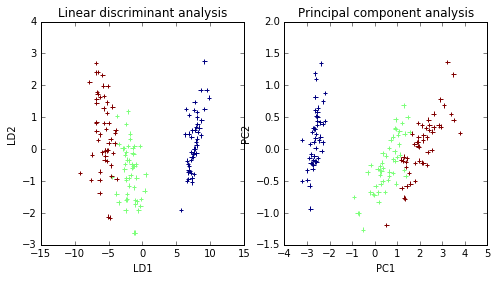

In [5]:
### Just as a comparison, PCA with the same number of components
irisPCA = PCA(n_components=2)
X_PCA = irisPCA.fit_transform(X)

plt.figure(figsize=[8,4])
# Plotting the first and second LDs
plt.subplot(121)
plt.scatter(X_LDA[:,0],X_LDA[:,1],c=y,marker='+')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('Linear discriminant analysis')

# Plotting the first and second PCs
plt.subplot(122)
plt.scatter(X_PCA[:,0],X_PCA[:,1],c=y,marker='+')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal component analysis')
plt.show()

You can examine contributions of different features on LD components, by examining the **`scalings_`** attribute of the LDA object. Here, we see examine LD1 and LD2.

In [6]:
# LD1
print(irisLDA.scalings_[:,0])

[ 0.81926852  1.5478732  -2.18494056 -2.85385002]


In LD1, the contributions from the petal length and width are large.

In [7]:
# LD2
print(irisLDA.scalings_[:,1])

[ 0.03285975  2.15471106 -0.93024679  2.8060046 ]


In LD2, the contributions from the sepal and petal widths seem to dominate.

# 3. Dimension reduction with LDA
<hr style="height:1px;border:none" />

Like PCAs, an LDA can be used as a means to reduce the data dimension, in a way that classes in the data are maximally separated. To demonstrate this, we will re-visit the digits data. In brief, the data set contains images of hand-written digits; there are 10 classes in this data set, corresponding to digits 0-9. Let's load the data.

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# loading the digits data
digits = datasets.load_digits()
digitsX = digits.data    # the data, 1797 x 64 array
digitsTargets = digits.target # target information
digitsFeatureNames = digits.target_names  # digits

Then let's perform an LDA. In this case, I do not specify **`n_components`**. If I do not specify `n_components`, then `LinearDiscriminantAnalysis` calculated as many components as necessary to achieve the cumulative explained variance of 1.0. In other words, the number of components necessary to explain all the variance in the data. Since we are providing the class information, the number of components may be significantly smaller than the number of all available features. Upon examining the Scree plot (using the **`.explained_variance_ratio_`** as in a PCA), we can see that there are only 9 components resulting from this LDA.

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


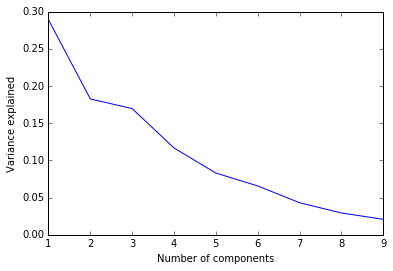

In [10]:
# Performing the linear discriminant analysis
digitsLDA = LinearDiscriminantAnalysis()
X_LDA = digitsLDA.fit_transform(digitsX,digitsTargets)

# plotting the Scree plot
plt.plot(np.arange(1,len(digitsLDA.explained_variance_ratio_)+1),
         digitsLDA.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('Variance explained')
plt.show()


You can determine the number of components based on the *elbow* on the Scree plot, or cumulative explained variance exceesing a certain threshold (e.g., 90% or variability explained).

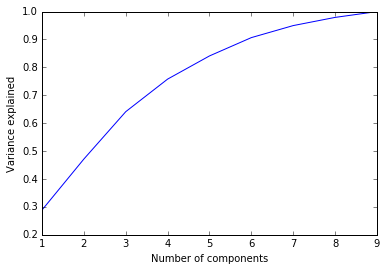

In [11]:
# plotting the cumulative explained variance
plt.plot(np.arange(1,len(digitsLDA.explained_variance_ratio_)+1),
         np.cumsum(digitsLDA.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance explained')
plt.show()

To examine the results, I plotted LD1 vs. LD2, with different digits denoted by different colors.

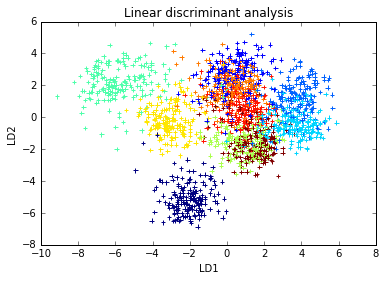

In [12]:
# Plotting the first and second LDs
plt.scatter(X_LDA[:,0],X_LDA[:,1],c=digitsTargets,marker='+')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('Linear discriminant analysis')
plt.show()

# 4. LDA classifier
<hr style="height:1px;border:none" />

Once we fit a data set to an LDA object, then it produces boundaries between different classes in the LD space. We can exploit such boundaries to ***classify*** (or assign a class label) if we have another data set with features but not targets. Here, we examine an LDA ***classifier*** resulting from the iris data analysis we saw earlier. 

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# loading the iris data
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

## Training and testing data

When you have a classifier, and want to examine how accurately it can classify, it is a good idea to have two separate data sets: **training data** and **testing data**. The training data is used to estimate the LDA classifier, including the boundaries between different classes. Both the features and the target information from the training data set are used to generate a classifier. Then the feature informaiotn from the testing data is fit to the classifier, in order to examine how accurately it can classify, or predict the class labels. The accuracy is assessed based on the target information from the test data set. 

There is a function called **`train_test_split`** under **`sklearn.model_selection`**. This function randomly split a data set into training and testing data sets. You can specify the proportion of the data to be saved later as the testing data (**`test_size`** parameter). In this example, we will use 40% (`test_size=0.4`) as the testing data.

In [15]:
# spliting the data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

Notice that it splits the features (the first two output parameters) and the targets (the last two output parameters). 

## Fitting an LDA on the training data

Now let's fit the LDA on the training data.

In [16]:
# fitting the LDA to the training data
irisLDA = LinearDiscriminantAnalysis(n_components=2)
X_train_LDA = irisLDA.fit_transform(X_train,y_train)

## Fitting the testing data to the LDA classifier

Now the LDA classifier is available as **`irisLDA`**. Then we use the **`.fit`** method to transform the testing data features into the LD space. Also, we produce the predicted target labels using the **`.predict`** method, based on the testing data features.

In [17]:
# classification on the testing data
X_test_LDA = irisLDA.transform(X_test)
y_pred = irisLDA.predict(X_test)

Just to see how accurate the classification results are, we plot the training data set with '+' and the testing data set with triangles. 

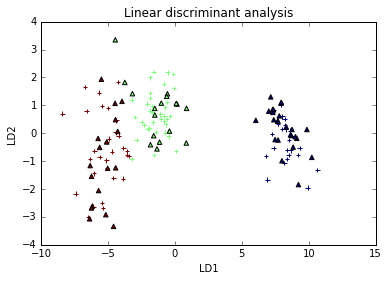

In [18]:
# Plotting the training and testing data
plt.scatter(X_train_LDA[:,0],X_train_LDA[:,1],c=y_train,marker='+') # training data
plt.scatter(X_test_LDA[:,0],X_test_LDA[:,1],c=y_pred,marker='^') # testing data
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('Linear discriminant analysis')
plt.show()

As you can see, the classification of the testing data seems fairly accurate.

## Assessing the classification performance

We can examine the classification results more closely. A good tool to examine classification results is a **confusion matrix**. In this matrix, the rows represent true class labels, and the columns represent different classes in the predicted classes from the testing data. If everything is classified accurately, then all observations are tallied on the main diagonal. Any off-diagonal elements are mis-classified observations. The confusion matrix allows us to examine in which categories observations are incorrectly classified. 

There is a function called **`confusion_matrix`** under **`sklearn.metrics`**. You just need to provide the target labels (the first input argument) and predicted labels (the second input argument). 

In [22]:
# confusion matrix
confusion_matrix(y_test,y_pred)

array([[25,  0,  0],
       [ 0, 14,  1],
       [ 0,  3, 17]])

Here, we see that all Setosas (first row / first column) are classified correctly. However, one Versicolor (second row) was classified as Virginica (third column).

There is also a function called **`classification_report`** under **`sklearn.metrics`**. This function calculates various metrics of classification performance under different classes. Like the `confusion_matrix` function, you provide the target labels (the first input argument) and predicted labels (the second input argument). You can also provide the target names as the parameter **`target_names`**.

In [20]:
# classification report
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        25
 versicolor       0.82      0.93      0.87        15
  virginica       0.94      0.85      0.89        20

avg / total       0.94      0.93      0.93        60



Here, 
  * **`precision`** refers to the ratio of the true positives (tp) to the sum of true positives (tp) and false positives (fp). i.e., tp/(tp+fp). In other words, the proportion of true positives among all positives discovered by the classifier.
  * **`recall`** refers to the ratio of the true positives (tp) to the sum of the true positives (tp) and false negatives (fn). i.e., tp/(tp+fn). In other words, the proportion of all positives discovered by the classifier among all the positives that should have been discovered by the classifier.
  * **`support`** refers to the number of observations in that class. 